# Gradients
This notebook provides a simple example of computing gradient scores per training example to characterize the contribution of each training example to the learning process.

It uses a simple `Perceptron` model to solve a binary classification problem. User may choose the input dataset as one of the below:
- 4 points describing a binary logic gate.
- 10 2D points belonging to two almost linearly separable classes.

In [8]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

from utils import Perceptron, Trainer, create_train_examples, plot_train_examples

## Dataset
The dataset comprises of 4 or 10 (depending on `type` parameter) training examples with 2 features each. The dataset is shuffled and batched (`batch_size` doesn't play a significant role here since all examples processed at each epoch).

Possible values of `type` parameter:
- `2D` that returns a dataset of 10 2D points
- `AND`, `OR`, `NAND`, `NOR`, `XOR` that returns 4 binary points

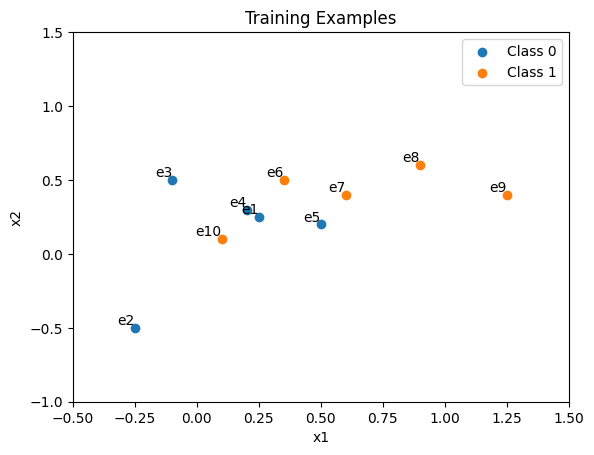

In [2]:
# Training examples
train_examples = create_train_examples(type="2D")

# Plot training examples in 2D space
plot_train_examples(train_examples)

## Training
This cell fits the Perceptron model to the training set using:
- SGD as learning algorithm.
- MSE as loss function.

In [3]:
# Trainer object
trainer = Trainer(
    model = Perceptron(),
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.SGD(learning_rate=1),
    train_examples = train_examples
)

# Train model
trainer.train(num_epochs=100, print_step_freq=50)

2023-07-14 19:23:38.804035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2023-07-14 19:23:38.804347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]


Epoch 50/100
		x=[[-0.1  0.5]], y=[[0.]], loss: 0.0392, GraNd: 0.0320
		x=[[1.25 0.4 ]], y=[[1.]], loss: 0.0021, GraNd: 0.0052
		x=[[0.1 0.1]], y=[[1.]], loss: 0.7288, GraNd: 0.0302
		x=[[-0.25 -0.5 ]], y=[[0.]], loss: 0.0002, GraNd: 0.0002
		x=[[0.25 0.25]], y=[[0.]], loss: 0.1199, GraNd: 0.0554
		x=[[0.5 0.2]], y=[[0.]], loss: 0.2363, GraNd: 0.1308
		x=[[0.2 0.3]], y=[[0.]], loss: 0.0582, GraNd: 0.0318
		x=[[0.6 0.4]], y=[[1.]], loss: 0.1715, GraNd: 0.1449
		x=[[0.35 0.5 ]], y=[[1.]], loss: 0.2438, GraNd: 0.1507
		x=[[0.9 0.6]], y=[[1.]], loss: 0.0048, GraNd: 0.0097
Epoch 100/100
		x=[[-0.1  0.5]], y=[[0.]], loss: 0.0329, GraNd: 0.0274
		x=[[0.6 0.4]], y=[[1.]], loss: 0.0870, GraNd: 0.0884
		x=[[0.1 0.1]], y=[[1.]], loss: 0.8344, GraNd: 0.0204
		x=[[0.9 0.6]], y=[[1.]], loss: 0.0011, GraNd: 0.0024
		x=[[0.25 0.25]], y=[[0.]], loss: 0.0819, GraNd: 0.0413
		x=[[0.35 0.5 ]], y=[[1.]], loss: 0.1482, GraNd: 0.1113
		x=[[-0.25 -0.5 ]], y=[[0.]], loss: 0.0000, GraNd: 0.0000
		x=[[1.25 0.4 ]

## Plot decision boundary
This cell plots the decision boundary line and its parameters along with the input examples.

Slope:     [-0.9339014]
Intercept: [0.76659274]


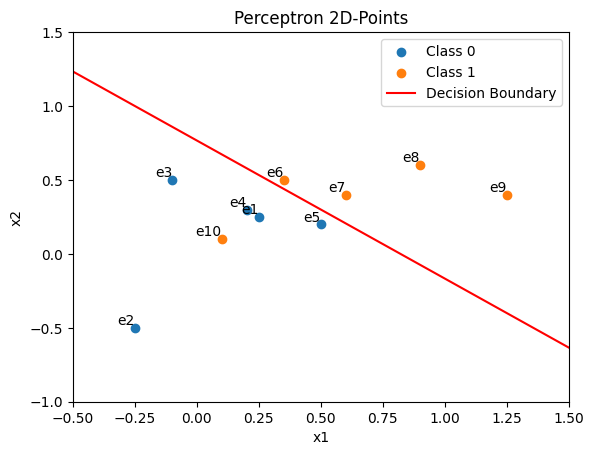

In [4]:
# Call the plotting function
trainer.plot_decision_boundary()

## Plot model parameters evolution
This cell creates a plot of the parameter values `w1`, `w2` and `b` with time, i.e. training iterations.

**Note**: Training iterations are computed as `batch_size` x `num_epochs`.

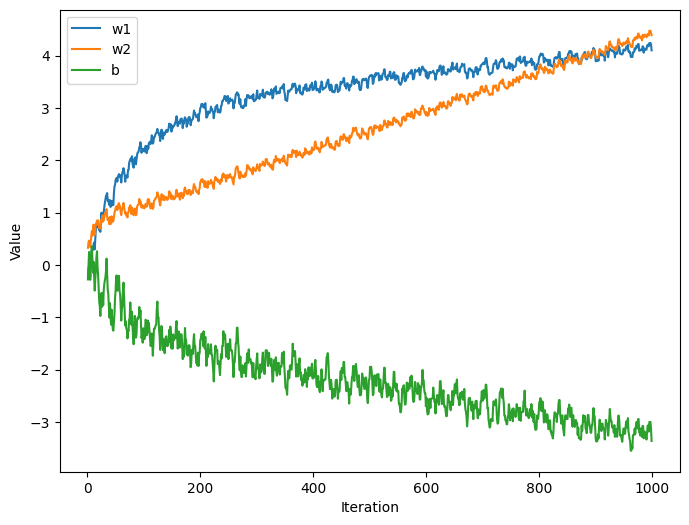

In [5]:
# Call the plotting function
trainer.plot_parameter_evolution()

## Plot GraNd scores evolution per training example
This cell plots the evolution of GraNd scores per example over time.

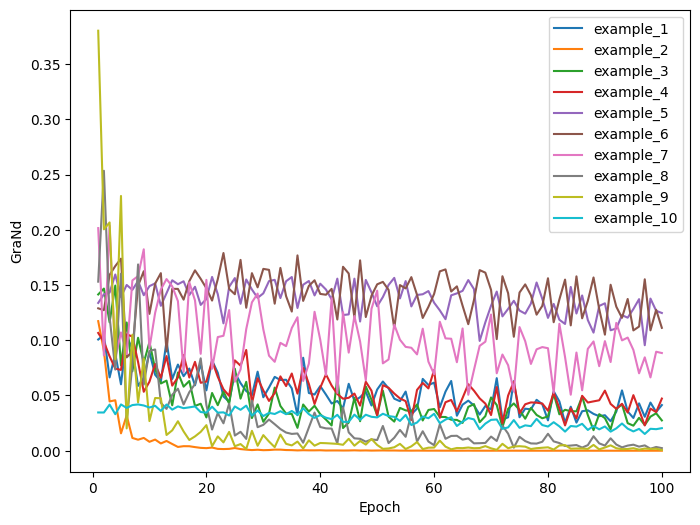

In [6]:
# Call the plotting function
trainer.plot_grand_evolution()

## Plot loss evolution per training example
This cell plots the evolution of the loss values per training example as the training progresses.

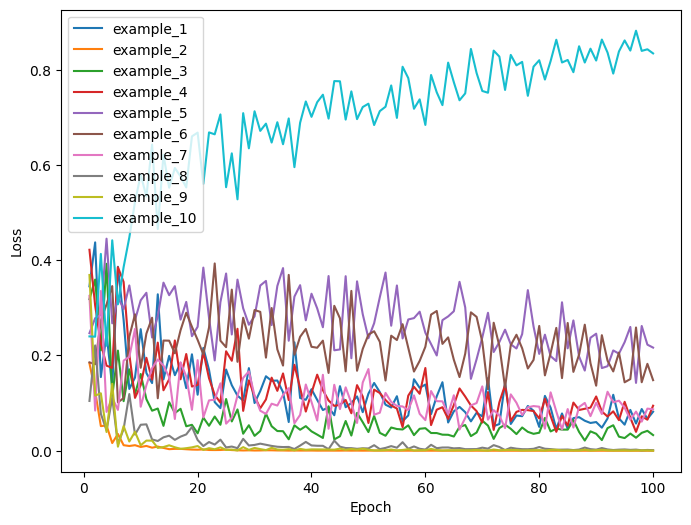

In [7]:
# Call the plotting function
trainer.plot_loss_evolution()